In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import confusion_matrix
# import seaborn as sns

In [3]:
iz = 244
bs = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle = True,
    seed = 16,
    image_size = (iz, iz),
    batch_size = bs
)

Found 666 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
print (class_names)          #class names are nothing but the files names i.e. it divided the class accourding the files

class_number = 1 # for sigmoid in model 

['Not_ok_augmented', 'OK_augmented']


In [6]:
# Now to split dataset we can do it following way
# 80% for training
# 10% for validation
# 10% for testing
ts = int(len(dataset)*0.8)
vs = int(len(dataset)*0.1)
# print("Total lenght of dataset : ", len(dataset))
# print("80% for training : ", int(len(dataset)*0.8))
# print("10% for validation : ", int(len(dataset)*0.1))
# print("10% for testing : ", int(len(dataset) - (int(len(dataset)*0.8) + int(len(dataset)*0.1))))

In [7]:
# Dividing the dataset

training_ds = dataset.take(ts)              #arr[:84]
remaining_ds = dataset.skip(ts)             #arr[84:]
validation_ds = remaining_ds.take(vs)
testing_ds = dataset.skip(ts)

print("Lenght of training dataset : ", len(training_ds))
print("Lenght of validation dataset : ", len(validation_ds))
print("Lenght of testing dataset : ", len(testing_ds))

Lenght of training dataset :  16
Lenght of validation dataset :  2
Lenght of testing dataset :  5


In [8]:
from tensorflow.keras.applications import ResNet50

model = models.Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights='imagenet', input_shape = (iz, iz, 3)))
model.add(Dense(class_number, activation='sigmoid'))
model.layers[0].trainable = False

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
early = EarlyStopping(monitor = 'val_loss', patience=3)

In [11]:
shistory_1 = model.fit(training_ds, epochs=10, validation_data=validation_ds, callbacks=early)

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 1.2593 - accuracy: 0.6289

KeyboardInterrupt: 

In [11]:
scores_1 = model.evaluate(testing_ds)
scores_1

5/5 [==============================] - 8s 884ms/step - loss: 4.4361 - accuracy: 0.4675


[4.436124324798584, 0.4675324559211731]

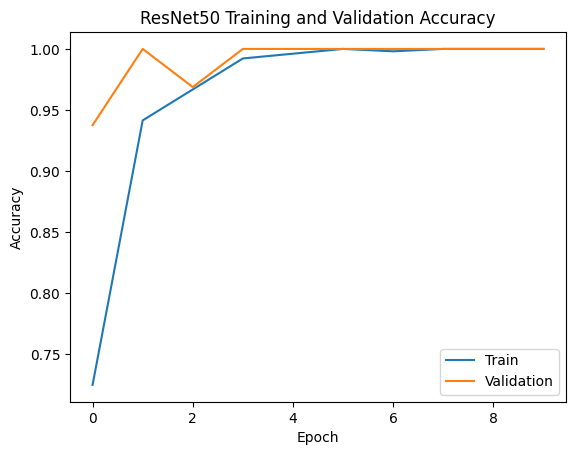

In [ ]:
# Plot training and validation accuracy
plt.plot(history_1.history['accuracy'], label='Train')
plt.plot(history_1.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 Training and Validation Accuracy')
plt.show()

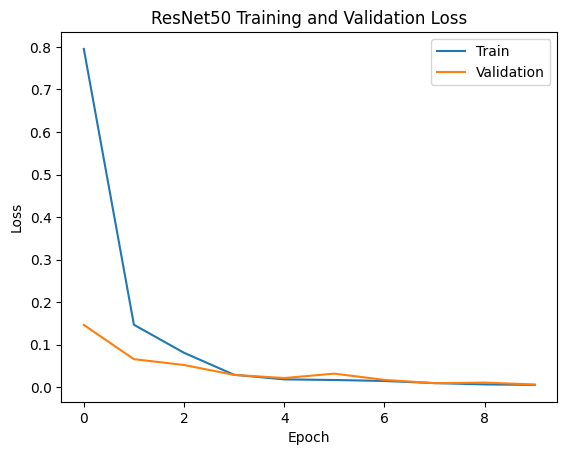

In [ ]:
# Plot training and validation accuracy
plt.plot(history_1.history['loss'], label='Train')
plt.plot(history_1.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet50 Training and Validation Loss')
plt.show()

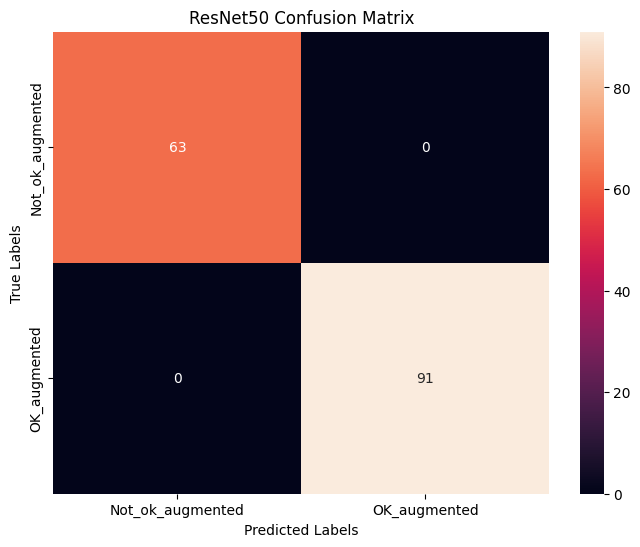

In [ ]:
# Get the predicted labels for the test set
predicted_labels = []
true_labels = []

for images, labels in testing_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ResNet50 Confusion Matrix')
plt.show()


In [ ]:
model.save(f"Models/ResNet50_V2")

INFO:tensorflow:Assets written to: Models/ResNet50_V2\assets


INFO:tensorflow:Assets written to: Models/ResNet50_V2\assets


In [ ]:
from tensorflow.keras.applications import VGG16

model = models.Sequential()
model.add(VGG16(include_top=False, pooling='max', weights='imagenet', input_shape = (iz, iz, 3)))
model.add(Dense(class_number, activation='sigmoid'))
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early = EarlyStopping(monitor = 'val_loss', patience=3)

In [ ]:
history_2 = model.fit(training_ds, epochs=10, validation_data=validation_ds, callbacks=early)

Epoch 1/10
16/16 [==============================] - 24s 816ms/step - loss: 5.8066 - accuracy: 0.5605 - val_loss: 1.8620 - val_accuracy: 0.7656
Epoch 2/10
16/16 [==============================] - 13s 768ms/step - loss: 3.1962 - accuracy: 0.6504 - val_loss: 1.9825 - val_accuracy: 0.7656
Epoch 3/10
16/16 [==============================] - 13s 788ms/step - loss: 1.7808 - accuracy: 0.7910 - val_loss: 0.9928 - val_accuracy: 0.8750
Epoch 4/10
16/16 [==============================] - 13s 766ms/step - loss: 1.0754 - accuracy: 0.8398 - val_loss: 0.4852 - val_accuracy: 0.9219
Epoch 5/10
16/16 [==============================] - 13s 779ms/step - loss: 0.7153 - accuracy: 0.8770 - val_loss: 0.6069 - val_accuracy: 0.9062
Epoch 6/10
16/16 [==============================] - 14s 797ms/step - loss: 0.5999 - accuracy: 0.9023 - val_loss: 0.3783 - val_accuracy: 0.8750
Epoch 7/10
16/16 [==============================] - 13s 777ms/step - loss: 0.4367 - accuracy: 0.9160 - val_loss: 0.5191 - val_accuracy: 0.9375

In [ ]:
scores_2 = model.evaluate(testing_ds)
scores_2

5/5 [==============================] - 14s 3s/step - loss: 0.1180 - accuracy: 0.9545


[0.11803732067346573, 0.9545454382896423]

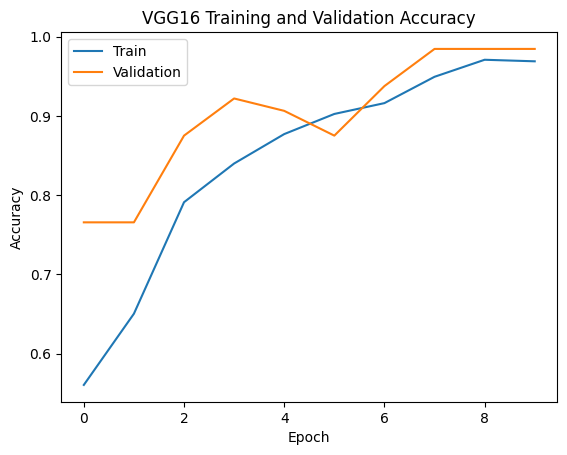

In [ ]:
# Plot training and validation accuracy
plt.plot(history_2.history['accuracy'], label='Train')
plt.plot(history_2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('VGG16 Training and Validation Accuracy')
plt.show()

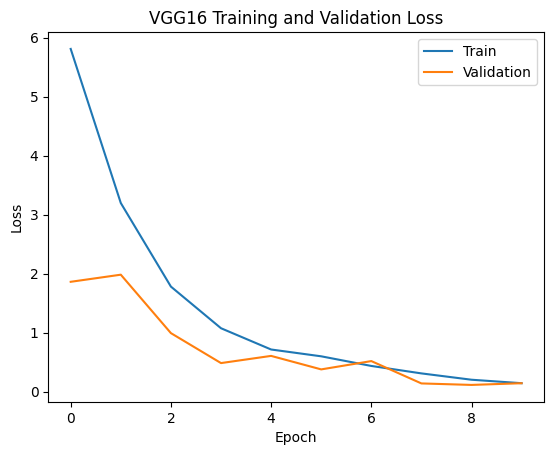

In [ ]:
# Plot training and validation accuracy
plt.plot(history_2.history['loss'], label='Train')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('VGG16 Training and Validation Loss')
plt.show()

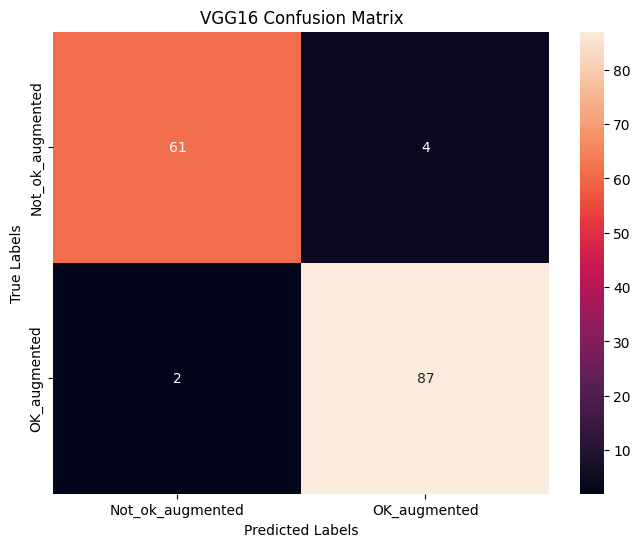

In [ ]:
# Get the predicted labels for the test set
predicted_labels = []
true_labels = []

for images, labels in testing_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('VGG16 Confusion Matrix')
plt.show()


In [ ]:
model.save(f"Models/VGG16_V2")

INFO:tensorflow:Assets written to: Models/VGG16_V2\assets


INFO:tensorflow:Assets written to: Models/VGG16_V2\assets


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B3

model = models.Sequential()
model.add(EfficientNetV2B3(include_top=False, pooling='max', weights='imagenet', input_shape = (iz, iz, 3)))
model.add(Dense(class_number, activation='sigmoid'))
model.layers[0].trainable = False

52606240/52606240 [==============================] - 75s 1us/step


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b3 (Function  (None, 1536)             12930622  
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 1537      
                                                                 
Total params: 12,932,159
Trainable params: 1,537
Non-trainable params: 12,930,622
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early = EarlyStopping(monitor = 'val_loss', patience=3)

In [ ]:
history_3 = model.fit(training_ds, epochs=10, validation_data=validation_ds, callbacks=early)

Epoch 1/10


16/16 [==============================] - 13s 411ms/step - loss: 0.7522 - accuracy: 0.6504 - val_loss: 0.2643 - val_accuracy: 0.9062
Epoch 2/10
16/16 [==============================] - 5s 299ms/step - loss: 0.2863 - accuracy: 0.8652 - val_loss: 0.1192 - val_accuracy: 0.9531
Epoch 3/10
16/16 [==============================] - 6s 350ms/step - loss: 0.1487 - accuracy: 0.9453 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 6s 341ms/step - loss: 0.1011 - accuracy: 0.9727 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 6s 351ms/step - loss: 0.0714 - accuracy: 0.9805 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 6s 350ms/step - loss: 0.0841 - accuracy: 0.9707 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 6s 351ms/step - loss: 0.0630 - accuracy: 0.9824 - val_loss: 0.0339 - val_accuracy: 0.9844
Epoch 8/10
16/16

In [ ]:
scores_3 = model.evaluate(testing_ds)
scores_3

5/5 [==============================] - 3s 192ms/step - loss: 0.0160 - accuracy: 1.0000


[0.0159828532487154, 1.0]

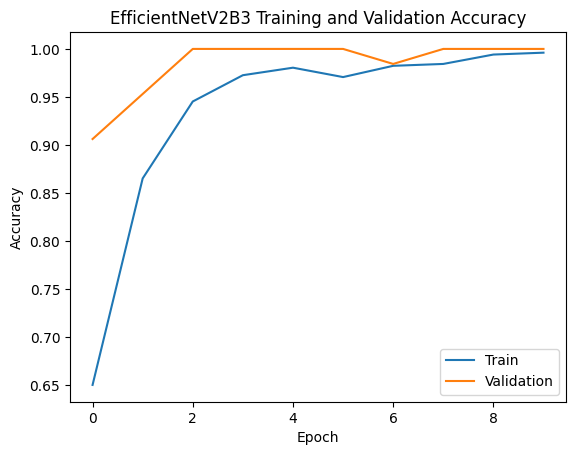

In [ ]:
# Plot training and validation accuracy
plt.plot(history_3.history['accuracy'], label='Train')
plt.plot(history_3.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('EfficientNetV2B3 Training and Validation Accuracy')
plt.show()

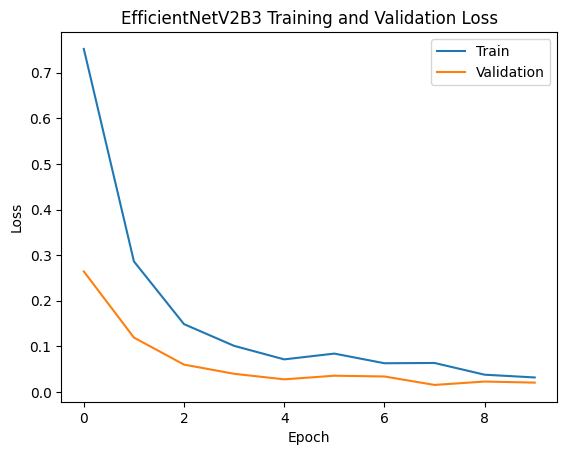

In [ ]:
# Plot training and validation accuracy
plt.plot(history_3.history['loss'], label='Train')
plt.plot(history_3.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('EfficientNetV2B3 Training and Validation Loss')
plt.show()

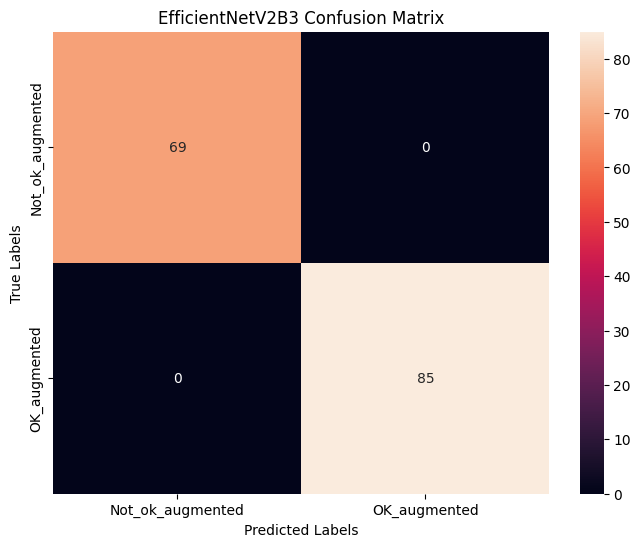

In [ ]:
# Get the predicted labels for the test set
predicted_labels = []
true_labels = []

for images, labels in testing_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('EfficientNetV2B3 Confusion Matrix')
plt.show()

In [ ]:
model.save(f"Models/EfficientNetV2B3_V2")

INFO:tensorflow:Assets written to: Models/EfficientNetV2B3_V2\assets


INFO:tensorflow:Assets written to: Models/EfficientNetV2B3_V2\assets


## Testing

In [3]:
model = models.load_model("Models/VGG16_V2")

In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
# pip install opencv-python

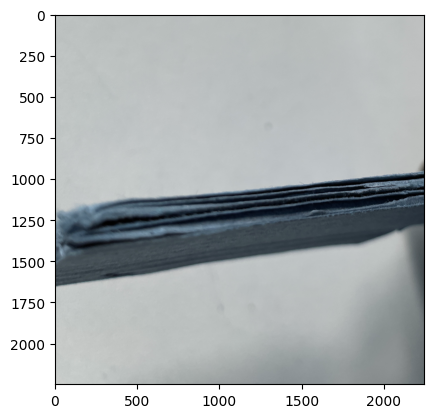

In [6]:
test_img = cv2.imread('IMG_0508.JPG')
plt.imshow(test_img)

In [7]:
test_img = cv2.resize(test_img,(iz,iz))
test_input = test_img.reshape((1,iz,iz,3))

In [8]:
threshold = 0.5
predictions = model.predict(test_input)
binary_predictions = (predictions > threshold).astype(int)
binary_predictions

1/1 [==============================] - 14s 14s/step


array([[0]])

In [18]:
import os
import cv2
import numpy as np


def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize
    return image

def evaluate_accuracy(image_folder, target_size, model, threshold):
    correct_predictions = 0
    total_predictions = 0
    predictions_list = []  # Store predictions for each image
    for image_file in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_file)
        # Preprocess image
        image = preprocess_image(image_path, target_size)
        # Prepare input for the model
        test_input = np.expand_dims(image, axis=0)
        # Make predictions
        predictions = model.predict(test_input)
        # Apply threshold
        binary_prediction = (predictions > threshold).astype(int)
        predictions_list.append((image_file, binary_prediction))  # Store prediction for this image
        # Update counts
        total_predictions += 1
        correct_predictions += 1
    # Calculate accuracy
    average_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return average_accuracy, predictions_list

# Folder containing test images
test_folder = r'C:\Users\Lenovo\Desktop\bajaj\OK'
# Target size for resizing images
target_size = (244, 244)  # Adjust this as needed
threshold = 0.5  # Adjust this as needed

# Evaluate accuracy
average_accuracy, predictions_list = evaluate_accuracy(test_folder, target_size, model, threshold)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

# Print predictions for each image
for image_file, prediction in predictions_list:
    print(f"Image: {image_file}, Prediction: {prediction}")


1/1 [==============================] - 0s 17ms/step
Average Accuracy: 1.0
Image: IMG_0381.JPG, Prediction: [[1]]
Image: IMG_0382.JPG, Prediction: [[1]]
Image: IMG_0383.JPG, Prediction: [[1]]
Image: IMG_0384.JPG, Prediction: [[1]]
Image: IMG_0385.JPG, Prediction: [[1]]
Image: IMG_0386.JPG, Prediction: [[1]]
Image: IMG_0387.JPG, Prediction: [[1]]
Image: IMG_0388.JPG, Prediction: [[1]]
Image: IMG_0389.JPG, Prediction: [[1]]
Image: IMG_0390.JPG, Prediction: [[1]]
Image: IMG_0391.JPG, Prediction: [[1]]
Image: IMG_0392.JPG, Prediction: [[1]]
Image: IMG_0393.JPG, Prediction: [[1]]
Image: IMG_0394.JPG, Prediction: [[1]]
Image: IMG_0395.JPG, Prediction: [[1]]
Image: IMG_0396.JPG, Prediction: [[1]]
Image: IMG_0397.JPG, Prediction: [[1]]
Image: IMG_0398.JPG, Prediction: [[1]]
Image: IMG_0399.JPG, Prediction: [[1]]
Image: IMG_0400.JPG, Prediction: [[1]]
Image: IMG_0401.JPG, Prediction: [[1]]
Image: IMG_0402.JPG, Prediction: [[1]]
Image: IMG_0403.JPG, Prediction: [[1]]
Image: IMG_0404.JPG, Predicti

In [ ]:
# test_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
# "dataset/OK_augmented",
# shuffle = False,
# # seed = 16,
# image_size = (iz,iz),
# batch_size = bs
# )

# scores = model.evaluate(test_test_ds)
# scores

# threshold = 0.5
# binary_predictions = (predictions > threshold).astype(int)
# binary_predictions

# plt.figure(figsize = (10, 10))
# for image_batch, lable_batch in test_test_ds.take(1):
#     for i in range(6):
#         ax = plt.subplot(3, 3, i+1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[lable_batch[i]])
#         plt.axis("off")